### Load and analyse ML models with a class object

In [1]:
import simcat
import toytree
import toyplot
toyplot.config.autoformat = "png"

### What I've learned: 
- `nsnps` is important, <10000 has high error, >20000 performs very well.
- `theta` and `migpropr` have little effect. 
- global scaling (normalization) has no effect. 
- per quartet scaling causes massive loss of information (score of 0.9 -> 0.02).
- NMF dimensionality reduction tranform doesn't improve classification (little worse).


In [105]:
data = simcat.Analysis(name="tr6-t10-r20-s20000", workdir="../databases", scale=1, run=False)


Dataset: tr6-t10-r20-s20000
loaded counts matrix: (9200, 15, 16, 16)
scaled integers to floats by max count
reshaped into X: (9200, 3840)
loaded labels DataFrame: (9200, 8)
subset as y: (9200,)
split train/test data: (6164, 3840)/(3036, 3840)


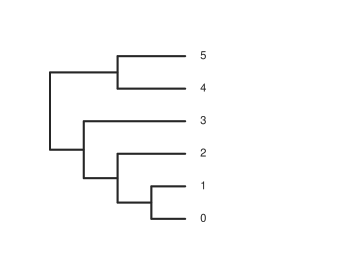

In [107]:
data.tree.draw();

In [2]:
data = simcat.Analysis(name="tr6-t10-r20-s20000", workdir="../databases", scale=1, run=False)

Dataset: tr6-t10-r20-s20000
loaded counts matrix: (9200, 15, 16, 16)
scaled integers to floats by max count
reshaped into X: (9200, 3840)
loaded labels DataFrame: (9200, 8)
subset as y: (9200,)
split train/test data: (6164, 3840)/(3036, 3840)
training model...
model score on training set: 1.000
model score on test/validation set: 0.904


In [4]:
data = simcat.Analysis(name="tr6-t10-r20-s20000", workdir="../databases", scale=2)

Dataset: tr6-t10-r20-s20000
loaded counts matrix: (9200, 15, 16, 16)
normalized counts for each quartet matrix
reshaped into X: (9200, 3840)
loaded labels DataFrame: (9200, 8)
subset as y: (9200,)
split train/test data: (6164, 3840)/(3036, 3840)
training model...
model score on test data: 0.021


In [5]:
data = simcat.Analysis(name="tr6-t10-r20-s20000", workdir="../databases", ulabel=True)

Dataset: tr6-t10-r20-s20000
loaded counts matrix: (9200, 15, 16, 16)
reshaped into X: (9200, 3840)
loaded labels DataFrame: (9200, 8)
subset as y: (9200,)
split train/test data: (6164, 3840)/(3036, 3840)
training model...
model score on test data: 0.951


### NMF data

In [103]:
aprop = np.array([0.05, 0.10, 0.25, 0.50])
nsnps = np.array([5000, 10000, 25000, 50000])
reps = np.arange(10)

ns = aprop.size * nsnps.size * reps.size



validate = pd.DataFrame({
    "admix_edge": [0] * ns,
    "admix_prop": 0,
    "nsnps": 0,
    "rep": 0,
    "est": 0,
    "prob": 0,
}, columns=["rep", "nsnps", "admix_edge", "admix_prop", "est", "prob"],
)

# 
idx = 0
for magn in [0.05, 0.1, 0.25, 0.5]:
    for nsnps in [5000, 10000, 25000, 50000]:
        for rep in range(10):
            #test = simcat.Model(ttree, [(1, 3, 0.5, 0.2)], nsnps=nsnps, run=True)
            #data[idx] = test.counts.flatten().reshape((1, -1))
            #forest.predict(test.counts.flatten().reshape((1, -1)))
            #pred = forest.predict(test.counts.flatten().reshape((1, -1)))
            #conf = sorted(forest.predict_proba(test.counts.flatten().reshape((1, -1)))[0], reverse=True)[:5]
            #print(idx, magn, nsnps, pred, conf)
            
            validate.loc[0] = rep, nsnps, "1,3", magn, "est", "prob"
            idx += 1


validate

,rep,nsnps,admix_edge,admix_prop,est,prob
0,9,50000,"1,3",0.5,est,prob
1,0,0,0,0.0,0,0
2,0,0,0,0.0,0,0
3,0,0,0,0.0,0,0
4,0,0,0,0.0,0,0
5,0,0,0,0.0,0,0
6,0,0,0,0.0,0,0
7,0,0,0,0.0,0,0
8,0,0,0,0.0,0,0
9,0,0,0,0.0,0,0


In [4]:
data.X.shape

(9200, 3840)

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import NMF

model = NMF(n_components=10, init='random', random_state=0)

W = model.fit_transform(data.X)
Wtrain = W[::2]
Wtest = W[1::2]
Ytrain = data.y[::2]
Ytest = data.y[1::2]

In [6]:
Wforest = ExtraTreesClassifier(
    n_estimators=1000,
    n_jobs=1,
    random_state=0,
)
Wforest.fit(Wtrain, Ytrain)
Wforest.score(Wtest, Ytest)

0.8610869565217392

In [9]:
from sklearn.manifold import TSNE

W.shape

(9200, 10)

In [12]:
data.X

array([[0.80689068, 0.15355168, 0.1412165 , ..., 0.10038282, 0.10080817,
        0.45767758],
       [0.84134411, 0.16248405, 0.14972352, ..., 0.10208422, 0.0944279 ,
        0.44959592],
       [0.84262016, 0.15312633, 0.17269247, ..., 0.09315185, 0.10165887,
        0.48830285],
       ...,
       [0.83241174, 0.14887282, 0.15397703, ..., 0.09868141, 0.10974054,
        0.45810293],
       [0.87452148, 0.16716291, 0.1646108 , ..., 0.0944279 , 0.09995746,
        0.43045513],
       [0.85452999, 0.15185028, 0.15737984, ..., 0.10506168, 0.09825606,
        0.46958741]])

In [13]:
XE = TSNE(
    n_components=2, 
    init="pca", 
    perplexity=10,
    n_iter=500,
    random_state=0)
embedding = XE.fit_transform(data.X)

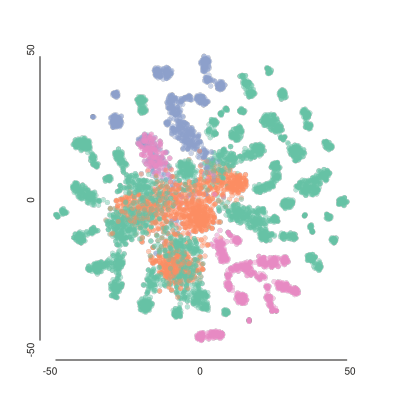

In [23]:
XE = TSNE(
    n_components=2, 
    init="pca", 
    perplexity=10,
    n_iter=500,
    random_state=0)
embedding = XE.fit_transform(data.X)

c = toyplot.Canvas(width=400, height=400);
a0 = c.cartesian(bounds=(50, 350, 50, 350))
a0.scatterplot(
    embedding[:, 0],
    embedding[:, 1],
    color=colors,
    #title=df.label,
    size=dat.df.theta * 2.,
    opacity=0.5,
);

In [ ]:
XE = TSNE(
    n_components=2, 
    init="pca", 
    perplexity=10,
    n_iter=1000,
    random_state=0)
embedding = XE.fit_transform(data.X)

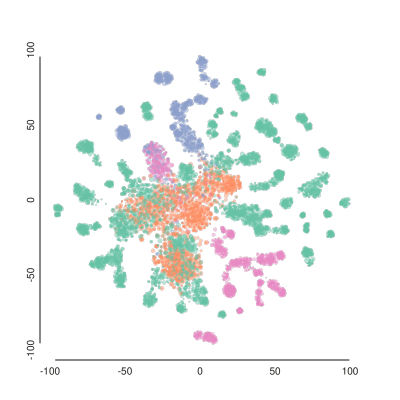

In [32]:
c = toyplot.Canvas(width=400, height=400);
a0 = c.cartesian(bounds=(50, 350, 50, 350))
a0.scatterplot(
    embedding[:, 0],
    embedding[:, 1],
    color=colors,
    #title=df.label,
    size=data.df.theta * 2.,
    opacity=0.5,
);

AttributeError: 'numpy.ndarray' object has no attribute 'df'

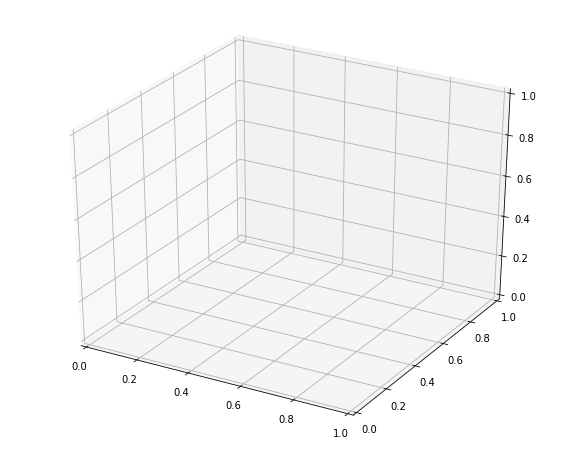

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
e = embedding3
ax.scatter3D(e[:, 0], e[:, 1], e[:, 2], 
             c=pd.Categorical(data.df.ulabel).codes,
             cmap='viridis',
            );

ax.view_init(60, 35)

In [34]:
TSNE3 = TSNE(
    n_components=3, 
    init="pca", 
    perplexity=20,
    n_iter=1000,
    random_state=0)

embedding3 = TSNE3.fit_transform(data.X)


AttributeError: 'numpy.ndarray' object has no attribute 'df'

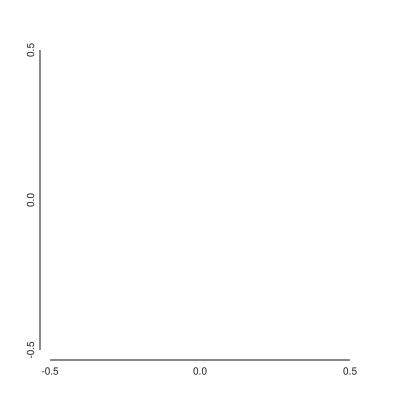

In [87]:
c = toyplot.Canvas(width=400, height=400);
a0 = c.cartesian(bounds=(50, 350, 50, 350))
a0.scatterplot(
    embedding3[:, 0],
    embedding3[:, 1],
    color=colors,
    #title=df.label,
    size=data.df.theta * 2.,
    opacity=0.5,
);

In [52]:
data.df.to_csv("../databases/df.csv")

In [38]:
np.savetxt("../databases/embedding3.npy", embedding3)
pd.cs

In [47]:
toyplot.color.to_css(colors[0])

'rgba(98.8%,55.3%,38.4%,1.000)'

In [48]:
with open("../databases/colors.txt", 'w') as out:
    for i in colors:
        out.write(toyplot.color.to_css(i) + "\n")

In [ ]:
XE = TSNE(
    n_components=2, 
    init="pca", 
    perplexity=75,
    n_iter=1000,
    random_state=0)
embedding = XE.fit_transform(data.X)

c = toyplot.Canvas(width=400, height=400);
a0 = c.cartesian(bounds=(50, 350, 50, 350))
a0.scatterplot(
    embedding[:, 0],
    embedding[:, 1],
    color=colors,
    #title=df.label,
    size=dat.df.theta * 2.,
    opacity=0.5,
);

In [ ]:
cls.score(embedding[::2], data.df.ulabel[::2])


In [30]:
cls = ExtraTreesClassifier(n_estimators=200, n_jobs=4)
cls.fit(embedding[::2], data.df.ulabel[::2])
cls.score(embedding[::2], data.df.ulabel[::2])
cls.score(embedding[1::2], data.df.ulabel[1::2])


0.8484782608695652

In [22]:
colors = [0] * data.df.shape[0]
for idx in data.df.index:
    if data.df.sisters[idx]:
        colors[idx] = 1
    if data.df.asource[idx] == 5:
        colors[idx] = 2
    if data.df.asource[idx] == 4:
        colors[idx] = 3
colors = [toyplot.color.Palette()[i] for i in colors]